# Data Analysis and Data Science
## Import Libraries

<hr style="border:1px solid black"> </hr>


In [1]:
import random
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

In [2]:
sns.set_theme(context="notebook", style="white", palette="Set2", rc={"figure.figsize": (9, 4)})

## Import Dataset

In [3]:
# data = pd.read_csv("../data/Sepsis_Cases.csv", sep=",", header=0, index_col=0)
# key_columns=['case:concept:name', 'concept:name', 'time:timestamp']

# data = pd.read_csv("../data/BPI_Challenge_2013.csv", sep=",", header=0, index_col=0)
# key_columns=['case:concept:name', 'lifecycle:transition', 'time:timestamp']

# data = pd.read_csv("../data/Helpdesk.csv", sep=",", header=0)
# key_columns=['Case ID', 'Activity', 'Complete Timestamp']

data = pd.read_csv("../data/BPI_Challenge_2014.csv", sep=";", header=0)
key_columns = ["Incident ID", "IncidentActivity_Type", "DateStamp"]

# Check data format

In [4]:
print(data.shape)
print(data.columns)
print(data.dtypes)

(466737, 7)
Index(['Incident ID', 'DateStamp', 'IncidentActivity_Number',
       'IncidentActivity_Type', 'Assignment Group', 'KM number',
       'Interaction ID'],
      dtype='object')
Incident ID                object
DateStamp                  object
IncidentActivity_Number    object
IncidentActivity_Type      object
Assignment Group           object
KM number                  object
Interaction ID             object
dtype: object


In [5]:
data["Incident ID"].nunique()
data["IncidentActivity_Type"].nunique()

39

In [6]:
data.head()

,Incident ID,DateStamp,IncidentActivity_Number,IncidentActivity_Type,Assignment Group,KM number,Interaction ID
0,IM0000004,07-01-2013 08:17:17,001A3689763,Reassignment,TEAM0001,KM0000553,SD0000007
1,IM0000004,04-11-2013 13:41:30,001A5852941,Reassignment,TEAM0002,KM0000553,SD0000007
2,IM0000004,04-11-2013 13:41:30,001A5852943,Update from customer,TEAM0002,KM0000553,SD0000007
3,IM0000004,04-11-2013 12:09:37,001A5849980,Operator Update,TEAM0003,KM0000553,SD0000007
4,IM0000004,04-11-2013 12:09:37,001A5849979,Assignment,TEAM0003,KM0000553,SD0000007


In [7]:
data_test = data.copy()
data_test = data_test[key_columns]
data_test.columns = ["case", "activity", "timestamp"]
print(data.shape)
print(data_test.shape)
data_test.head(20)

(466737, 7)
(466737, 3)


,case,activity,timestamp
0,IM0000004,Reassignment,07-01-2013 08:17:17
1,IM0000004,Reassignment,04-11-2013 13:41:30
2,IM0000004,Update from customer,04-11-2013 13:41:30
3,IM0000004,Operator Update,04-11-2013 12:09:37
4,IM0000004,Assignment,04-11-2013 12:09:37
5,IM0000004,Assignment,04-11-2013 13:41:30
6,IM0000004,Closed,04-11-2013 13:51:18
7,IM0000004,Caused By CI,04-11-2013 13:51:18
8,IM0000004,Reassignment,04-11-2013 12:09:37
9,IM0000004,Operator Update,25-09-2013 08:27:40


In [8]:
data_test[data_test["case"] == "IM0000004"]

,case,activity,timestamp
0,IM0000004,Reassignment,07-01-2013 08:17:17
1,IM0000004,Reassignment,04-11-2013 13:41:30
2,IM0000004,Update from customer,04-11-2013 13:41:30
3,IM0000004,Operator Update,04-11-2013 12:09:37
4,IM0000004,Assignment,04-11-2013 12:09:37
5,IM0000004,Assignment,04-11-2013 13:41:30
6,IM0000004,Closed,04-11-2013 13:51:18
7,IM0000004,Caused By CI,04-11-2013 13:51:18
8,IM0000004,Reassignment,04-11-2013 12:09:37
9,IM0000004,Operator Update,25-09-2013 08:27:40


In [9]:
data_test.sort_index(ascending=True)

,case,activity,timestamp
0,IM0000004,Reassignment,07-01-2013 08:17:17
1,IM0000004,Reassignment,04-11-2013 13:41:30
2,IM0000004,Update from customer,04-11-2013 13:41:30
3,IM0000004,Operator Update,04-11-2013 12:09:37
4,IM0000004,Assignment,04-11-2013 12:09:37
...,...,...,...
466732,IM0047056,Closed,31-03-2014 15:42:37
466733,IM0047057,Open,31-03-2014 17:24:50
466734,IM0047057,Update,31-03-2014 17:25:07
466735,IM0047057,Closed,31-03-2014 22:47:33


In [10]:
ACTIVITY_LIST = data_test["activity"].unique()
CASE_LIST = data_test["case"].unique()

print(ACTIVITY_LIST)
print(CASE_LIST)

['Reassignment' 'Update from customer' 'Operator Update' 'Assignment'
 'Closed' 'Caused By CI' 'Update' 'Status Change' 'Description Update'
 'Analysis/Research' 'Resolved' 'OO Response'
 'Communication with customer' 'External Vendor Assignment'
 'Pending vendor' 'Open' 'Communication with vendor' 'Reopen'
 'Vendor Reference' 'Urgency Change' 'Impact Change'
 'Quality Indicator Fixed' 'Problem Workaround' 'Problem Closure'
 'Service Change' 'Affected CI Change' 'Referred'
 'Vendor Reference Change' 'Incident reproduction' 'Quality Indicator'
 'Notify By Change' 'Contact Change' 'Mail to Customer'
 'Quality Indicator Set' 'Callback Request' 'External update'
 'External Vendor Reassignment' 'alert stage 1' 'Dial-in']
['IM0000004' 'IM0000005' 'IM0000011' ... 'IM0047055' 'IM0047056'
 'IM0047057']


## Distribution of activities

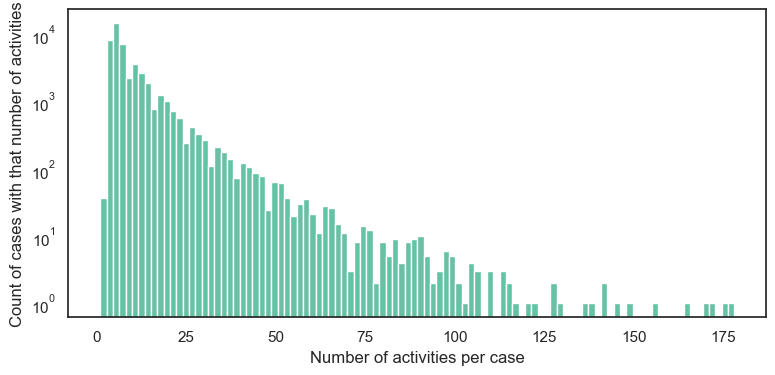

In [11]:
x = []
for case in CASE_LIST:
    # print(case)
    df_case = data_test[data_test["case"] == case]
    x.append(df_case.shape[0])

plt.hist(x, bins=100)
plt.yscale("log")
plt.xlabel("Number of activities per case")
plt.ylabel("Count of cases with that number of activities")
plt.show()

In [12]:
def next_activity_matrix(df, normalize=False):
    activity_matrix = pd.DataFrame(0, index=ACTIVITY_LIST, columns=ACTIVITY_LIST)

    for case in CASE_LIST:
        df_case = df[df["case"] == case].sort_values(by="timestamp", ascending=True)
        df_case["next_activity"] = df_case["activity"].shift(-1)

        for _, row in df_case.iterrows():
            if pd.notna(row["next_activity"]):
                activity_matrix.loc[row["activity"], row["next_activity"]] += 1

    if normalize:
        activity_matrix = activity_matrix.div(activity_matrix.sum(axis=1), axis=0)

    return activity_matrix


def plot_next_activity_heatmap_log(activity_matrix, logscale=True):
    # Log transformation (adding 1 to avoid log(0))
    log_matrix = np.log1p(activity_matrix) if logscale else activity_matrix

    plt.figure(figsize=(12, 8))
    if logscale:
        ax = sns.heatmap(log_matrix, fmt=".0f", cmap="Blues", linewidths=0.5, cbar_kws={"label": "Log Scale Value"})
    else:
        ax = sns.heatmap(log_matrix, fmt=".2f", cmap="Blues", linewidths=0.5, cbar_kws={"label": "Probability"})

    # Improve labels
    ax.set_xlabel("Next Activity", fontsize=14, labelpad=15)
    ax.set_ylabel("Current Activity", fontsize=14, labelpad=15)
    ax.set_title("Next Activity Transition Heatmap", fontsize=16, pad=20)

    # Rotate labels for better readability
    plt.xticks(rotation=45, ha="right", fontsize=12)
    plt.yticks(rotation=0, fontsize=12)

    plt.show()

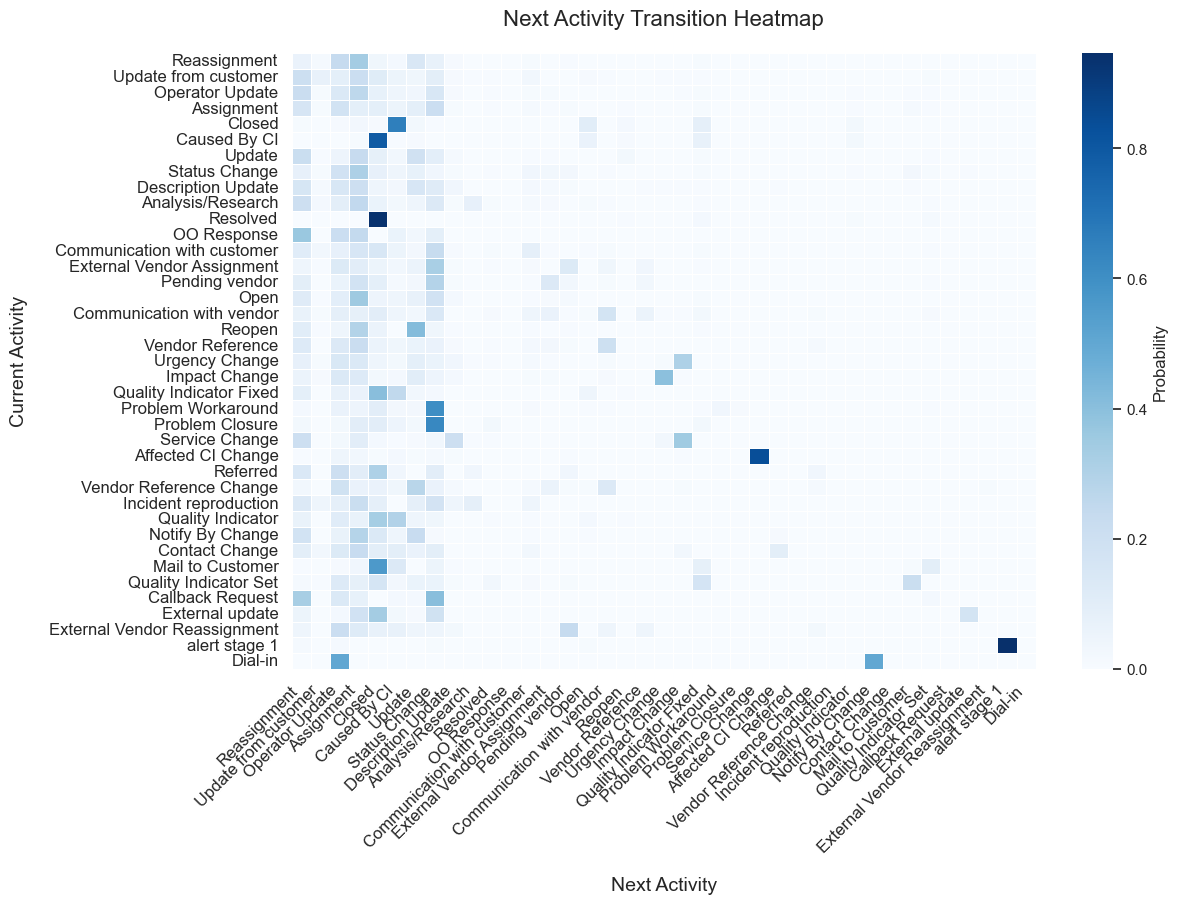

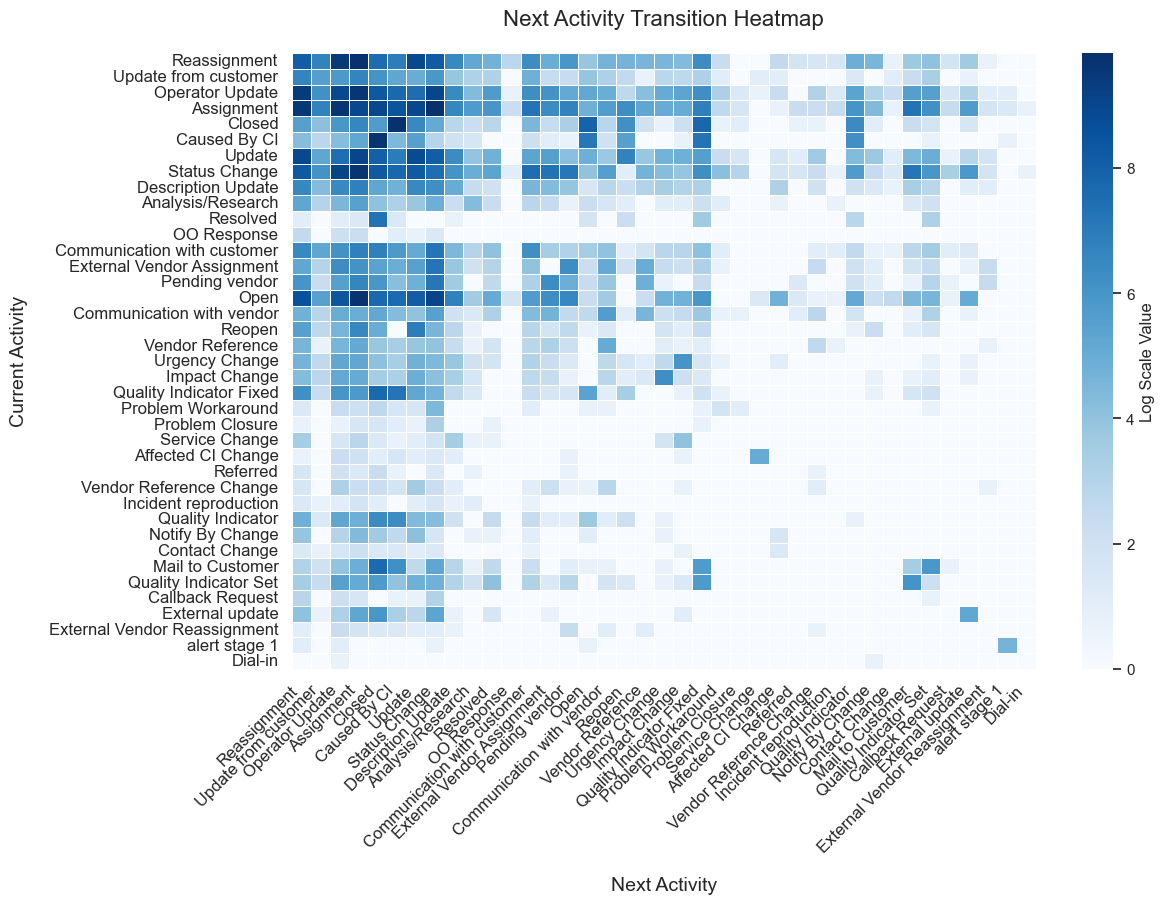

In [13]:
# Generate and plot heatmap
PROBABILITIES = True
activity_transition_matrix = next_activity_matrix(data_test, normalize=PROBABILITIES)
plot_next_activity_heatmap_log(activity_transition_matrix, logscale=not PROBABILITIES)

# Generate and plot heatmap
PROBABILITIES = False
activity_transition_matrix = next_activity_matrix(data_test, normalize=PROBABILITIES)
plot_next_activity_heatmap_log(activity_transition_matrix, logscale=not PROBABILITIES)

# Sequence analysis

In [14]:
# Extract sequences per case
grouped_by_case = data_test.groupby("case")["activity"].apply(list).tolist()


# Function to generate unique subsequences for the entire dataset (global uniqueness)
def generate_unique_subsequences(sequences):
    unique_subsequences = set()  # Store all unique subsequences across the dataset
    for sequence in sequences:
        for length in range(1, len(sequence) + 1):  # length of subsequence
            for start in range(len(sequence) - length + 1):  # start of subsequence
                unique_subsequences.add(tuple(sequence[start : start + length]))  # Add unique subsequence
    return unique_subsequences


# Generate unique subsequences for real data
unique_subsequences = generate_unique_subsequences(grouped_by_case)


# Function to generate all subsequences
def generate_subsequences(sequence):
    subsequences = []
    for length in range(1, len(sequence) + 1):  # length of subsequence
        for start in range(len(sequence) - length + 1):  # start of subsequence
            subsequences.append(tuple(sequence[start : start + length]))  # append subsequence as a tuple
    return subsequences


# Compute real subsequence length distribution
subsequence_lengths = [len(seq) for seq in unique_subsequences]

# Extract sequence lengths and activity distribution
sequence_lengths = [len(seq) for seq in grouped_by_case]

max_seq_length = max(sequence_lengths)

subsequence_counts = Counter()
for sequence in grouped_by_case:
    subsequences = generate_subsequences(sequence)
    subsequence_counts.update(subsequences)

In [15]:
# Generate Random Baseline
activity_pool = [act for seq in grouped_by_case for act in seq]
activity_distribution = Counter(activity_pool)

# Generate random sequences with the same length and activity distribution
random_sequences = []
for length in sequence_lengths:
    random_seq = random.choices(
        list(activity_distribution.keys()), weights=list(activity_distribution.values()), k=length
    )  # Sample activities
    random.shuffle(random_seq)  # Shuffle activities randomly
    random_sequences.append(random_seq)

# Ensure uniqueness computation is the same
unique_random_subsequences = generate_unique_subsequences(random_sequences)

# Compute random baseline subsequence length distribution
subsequence_lengths_random = [len(seq) for seq in unique_random_subsequences]
length_counts_random = Counter(subsequence_lengths_random)

# Convert to sorted lists for plotting the random baseline
sorted_lengths = sorted(length_counts_random.keys())
random_baseline_freqs = [length_counts_random[length] for length in sorted_lengths]

In [16]:
# Compute the distance between the two distributions
distance = scipy.stats.wasserstein_distance(subsequence_lengths, subsequence_lengths_random)
print(f"Wasserstein Distance: {distance}")

Wasserstein Distance: 0.6321924621502297


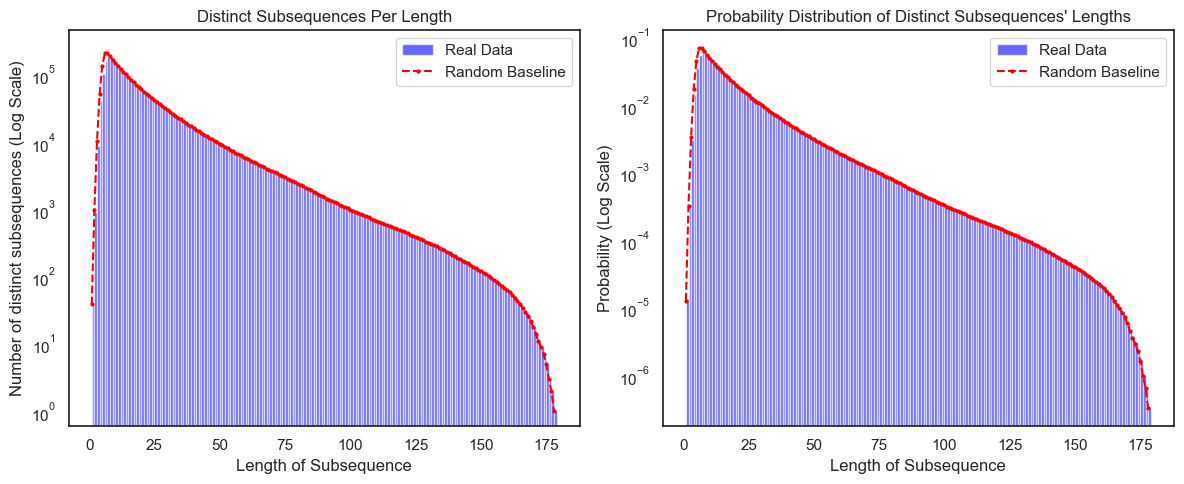

In [17]:
# Step 3: Plot Real vs Random Baseline Distribution
plt.figure(figsize=(12, 5))

# ---------------- First Plot: Raw Counts ----------------
plt.subplot(1, 2, 1)
# Real data: Histogram
plt.hist(subsequence_lengths, bins=range(1, max(subsequence_lengths) + 2), alpha=0.6, label="Real Data", color="blue")

# Random baseline: Smooth line plot
plt.plot(
    sorted_lengths,
    random_baseline_freqs,
    linestyle="--",
    marker="o",
    markersize=2,
    color="red",
    label="Random Baseline",
)

# Add Boxplots for both distributions
boxplot = plt.boxplot(
    [subsequence_lengths, subsequence_lengths_random],
    vert=False,
    positions=[0.05, 0.1],  # Adjust positions to avoid overlap
    widths=0.04,  # Make boxplots thinner
    patch_artist=True,
    medianprops=dict(color="black"),
)

# Manually set colors for each box
colors = ["blue", "red"]
for patch, color in zip(boxplot["boxes"], colors, strict=False):
    patch.set_facecolor(color)
    patch.set_alpha(0.5)  # Make it slightly transparent

# Formatting
plt.yscale("log")
plt.xlabel("Length of Subsequence")
plt.ylabel("Number of distinct subsequences (Log Scale)")
plt.title("Distinct Subsequences Per Length")
plt.legend()

# ---------------- Second Plot: Probability Distribution ----------------
plt.subplot(1, 2, 2)
# Real data: Probability Distribution (normalized)
plt.hist(
    subsequence_lengths,
    bins=range(1, max(subsequence_lengths) + 2),
    density=True,
    alpha=0.6,
    label="Real Data",
    color="blue",
)

# Random baseline: Probability Distribution (normalized)
plt.plot(
    sorted_lengths,
    random_baseline_freqs / np.sum(random_baseline_freqs),
    linestyle="--",
    marker="o",
    markersize=2,
    color="red",
    label="Random Baseline",
)

# Formatting
plt.xlabel("Length of Subsequence")
plt.ylabel("Probability (Log Scale)")
plt.yscale("log")
plt.title("Probability Distribution of Distinct Subsequences' Lengths")
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
def compute_conditional_distributions(data, max_suffix_length):
    """Computes next-activity distributions conditioned on fixed prefix lengths."""
    # Dictionary to store the next activity counts: {(last activity A, prefix length) -> counts per next activity}
    conditional_counts = {
        (a, suffix_len): dict.fromkeys(ACTIVITY_LIST, 0)
        for a in ACTIVITY_LIST
        for suffix_len in range(2, max_suffix_length + 1)
    }
    # Dictionary to store distributions: {(last activity A, prefix length) -> distribution for next activity}
    conditional_distributions = {
        (a, suffix_len): dict.fromkeys(ACTIVITY_LIST, 0.0)
        for a in ACTIVITY_LIST
        for suffix_len in range(2, max_suffix_length + 1)
    }

    # Loop over each possible suffix length
    for suffix_length in range(2, max_suffix_length + 1):
        # Loop over each case in the dataset
        for case in CASE_LIST:
            df_case = data[data["case"] == case].sort_values(by="timestamp", ascending=True)
            sequence = df_case["activity"].tolist()

            # Loop over each position in the sequence (where the prefix can be of length ''suffix_length'')
            for i in range(len(sequence) - suffix_length):
                next_act = sequence[i + suffix_length]  # Next activity after the prefix
                last_act = sequence[i + suffix_length - 1]  # Last activity in the prefix
                conditional_counts[(last_act, suffix_length)][next_act] += 1  # Increment count for the next activity

        # Normalize the distribution for each prefix
        for last_act in ACTIVITY_LIST:
            total = sum(conditional_counts[(last_act, suffix_length)].values())
            if total > 0:
                for next_act in ACTIVITY_LIST:
                    conditional_distributions[(last_act, suffix_length)][next_act] = (
                        conditional_counts[(last_act, suffix_length)][next_act] / total
                    )

    return conditional_counts, conditional_distributions

In [19]:
from matplotlib.colors import Normalize


def plot_conditional_activity_matrix(conditional_counts, conditional_distributions, suffix_length_list):
    """Plot a heatmap of conditional activity distributions for each prefix length with count indicators."""
    # Check if all suffix lengths are present in both conditional_counts and conditional_distributions
    missing_suffix_lengths = [
        length
        for length in suffix_length_list
        if not any((activity, length) in conditional_counts for activity in ACTIVITY_LIST)
        or not any((activity, length) in conditional_distributions for activity in ACTIVITY_LIST)
    ]

    if missing_suffix_lengths:
        raise ValueError(f"The following suffix lengths are missing in the data: {missing_suffix_lengths}")

    num_activities = len(ACTIVITY_LIST)
    num_suffix_lengths = len(suffix_length_list)

    # Compute counts matrix for given suffix lengths
    counts_matrix = np.array(
        [
            [
                sum(conditional_counts.get((activity, suffix_length), {}).values())
                for suffix_length in suffix_length_list
            ]
            for activity in ACTIVITY_LIST
        ]
    )

    activity_idxs = {activity: idx for idx, activity in enumerate(ACTIVITY_LIST)}

    # Fill probability matrix
    matrix = np.zeros((num_activities, num_suffix_lengths, num_activities))
    for activity in ACTIVITY_LIST:
        for idx, suffix_length in enumerate(suffix_length_list):
            dist = conditional_distributions.get((activity, suffix_length), {})
            for next_activity, prob in dist.items():
                act_idx = activity_idxs[activity]
                next_act_idx = activity_idxs[next_activity]
                matrix[act_idx, idx, next_act_idx] = prob

    # Create subplots dynamically based on suffix lengths
    fig, axes = plt.subplots(
        1, num_suffix_lengths + 1, figsize=(12, 8), gridspec_kw={"width_ratios": [0.3] + [1] * num_suffix_lengths}
    )

    # Normalize count colors across all suffix lengths
    norm = Normalize(vmin=counts_matrix.min(), vmax=counts_matrix.max())
    cmap_counts = sns.color_palette("Reds", as_cmap=True)

    # Leftmost column: Count indicators
    ax_counts = axes[0]
    sns.heatmap(
        counts_matrix,
        annot=True,
        fmt="d",
        cmap=cmap_counts,
        norm=norm,
        linewidths=0.5,
        cbar=False,
        yticklabels=ACTIVITY_LIST,
        xticklabels=[],
        ax=ax_counts,
        annot_kws={"size": 8, "rotation": 90},
    )  # Adjust font size & rotation
    ax_counts.set_title("Counts")

    # Probability heatmaps for selected suffix lengths
    for suffix_idx, suffix_length in enumerate(suffix_length_list):
        matrix_slice = matrix[:, suffix_idx, :]

        ax = axes[suffix_idx + 1]
        sns.heatmap(
            matrix_slice,
            annot=False,
            fmt=".2f",
            cmap="Blues",
            linewidths=0.5,
            yticklabels=[],
            xticklabels=ACTIVITY_LIST,
            cbar=False,
            ax=ax,
        )

        ax.set_title(f"Suffix Length {suffix_length}")
        ax.set_xlabel("Next Activity")
        ax.set_xticks(np.arange(num_activities) + 0.5)
        ax.set_xticklabels(ACTIVITY_LIST, rotation=90, fontsize=10)

        if suffix_idx == num_suffix_lengths - 1:
            cbar = fig.colorbar(ax.collections[-1], ax=axes, orientation="vertical")
            cbar.outline.set_visible(False)  # Remove dark border
            cbar.ax.set_position((1.0, 0.1, 0.02, 0.8))  # Adjust height
            cbar.set_label("Probability")
            cbar.set_ticks([0, 0.5, 1], minor=True)  # Set colorbar ticks from 0 to 1

    plt.tight_layout()
    plt.show()

In [20]:
# Compute distributions
global_dist = next_activity_matrix(data_test, normalize=True)
conditional_counts, conditional_dist = compute_conditional_distributions(data_test, max_suffix_length=20)

/var/folders/69/dpfqds0n6f9dds88rmx8pvp40000gp/T/ipykernel_2499/1912599470.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


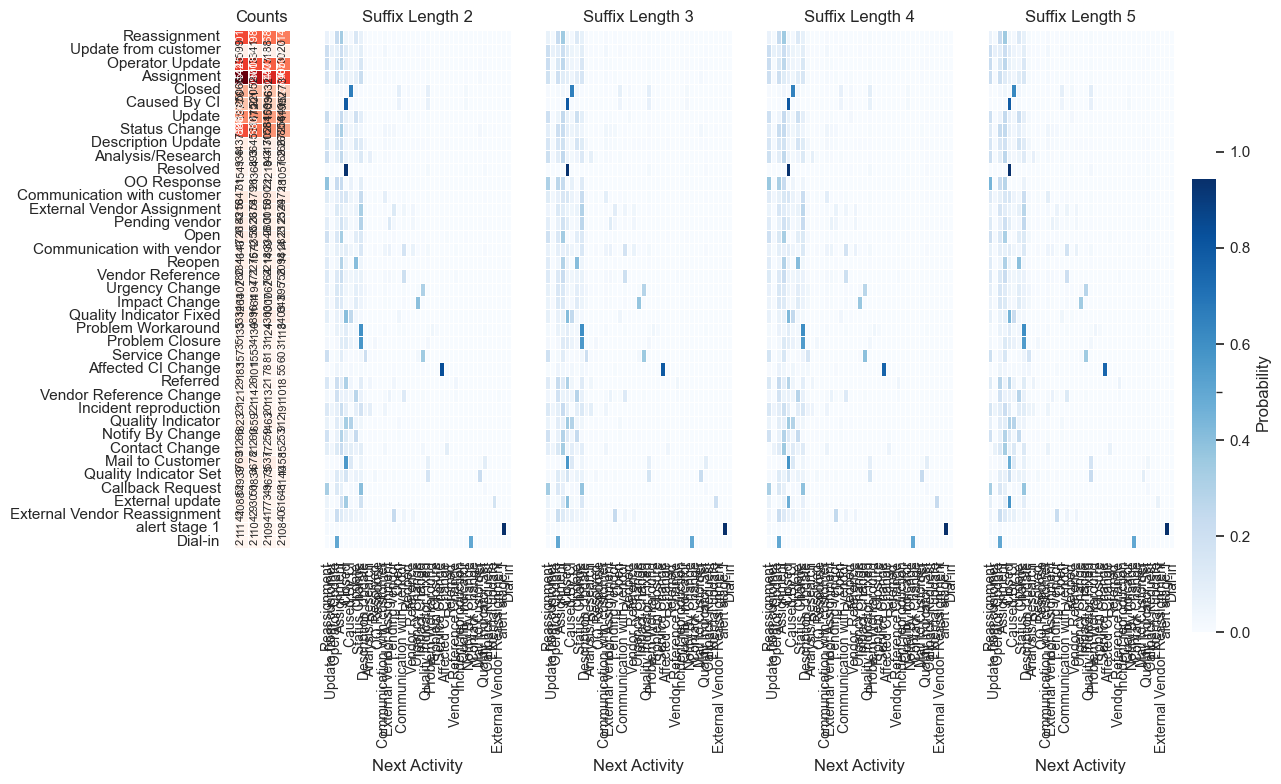

In [21]:
plot_conditional_activity_matrix(conditional_counts, conditional_dist, suffix_length_list=range(2, 6))

/var/folders/69/dpfqds0n6f9dds88rmx8pvp40000gp/T/ipykernel_2499/1912599470.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


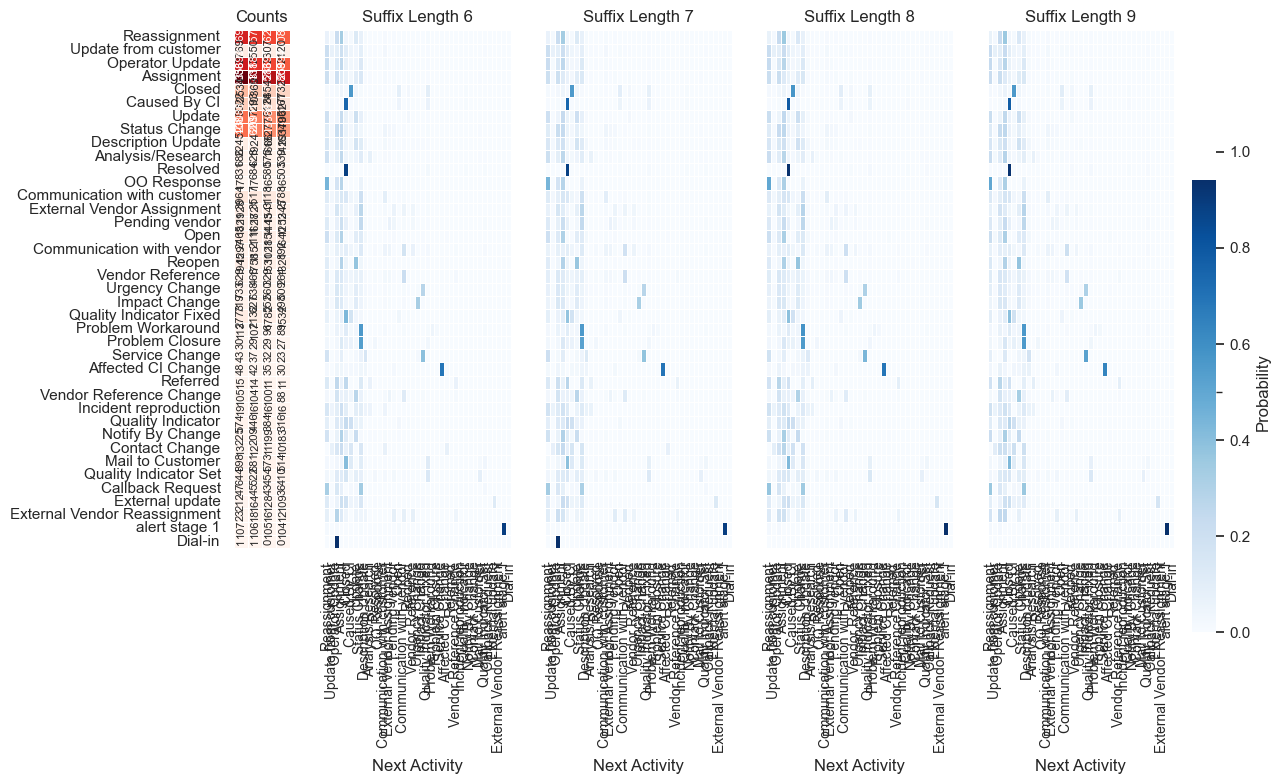

In [22]:
plot_conditional_activity_matrix(conditional_counts, conditional_dist, suffix_length_list=range(6, 10))

In [23]:
from matplotlib.ticker import MaxNLocator


def compute_conditional_entropy(conditional_distributions):
    """Compute the conditional entropy for each prefix length."""
    conditional_entropy = {}
    for (last_act, suffix_len), dist in conditional_distributions.items():
        entropy = -sum(prob * np.log2(prob) if prob > 0 else 0 for prob in dist.values())
        conditional_entropy[(last_act, suffix_len)] = max(0, entropy)
    return conditional_entropy


def plot_conditional_entropy_table(conditional_entropy, suffix_length_list):
    """Plot the conditional entropy for each prefix length."""
    entropy_values = np.array(
        [
            conditional_entropy.get((activity, suffix_length), 0)
            for activity in ACTIVITY_LIST
            for suffix_length in suffix_length_list
        ]
    ).reshape(len(ACTIVITY_LIST), -1)

    fig, ax = plt.subplots(figsize=(12, 6))
    sns.heatmap(
        entropy_values,
        annot=True,
        fmt=".2f",
        cmap="viridis",
        linewidths=0.5,
        yticklabels=ACTIVITY_LIST,
        xticklabels=suffix_length_list,
        cbar_kws={"label": "Entropy"},
        ax=ax,
    )
    ax.set_xlabel("Prefix Length")
    ax.set_ylabel("Last Activity")
    ax.set_title("Conditional Entropy of Next Activity Prediction")
    plt.show()


def plot_conditional_entropy_curves(conditional_entropy, suffix_length_list):
    """Plot the conditional entropy curves for each activity."""
    fig, ax = plt.subplots(figsize=(12, 6))
    for activity in ACTIVITY_LIST:
        entropies = [conditional_entropy.get((activity, suffix_length), 0) for suffix_length in suffix_length_list]
        ax.plot(suffix_length_list, entropies, label=f"{activity}")

    # Set the x-axis labels to be integers
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

    # Set explicit ticks for each integer
    ax.set_xticks(
        np.arange(min(suffix_length_list), max(suffix_length_list) + 1, 1)
    )  # Replace x_data with the appropriate x values you want to display ticks for

    ax.set_xlabel("Prefix Length")
    ax.set_ylabel("Conditional Entropy")
    ax.set_title("Conditional Entropy of Next Activity Prediction")
    ax.legend(title="Last Activity", bbox_to_anchor=(1, 1))

    plt.show()


def plot_entropy_difference_aggregated(conditional_entropy, suffix_length_list):
    """Plot a bar per length l, split by activities showing the difference in entropy between lengths l and l+1."""
    # Initialize the figure and axis
    fig, ax = plt.subplots(figsize=(12, 6))

    # Define the bar width
    bar_width = 0.8
    index = np.arange(len(suffix_length_list) - 1)  # Positions for bars corresponding to lengths l

    # Define colors for each activity (you can adjust the colormap here)
    activity_colors = plt.get_cmap("tab20", len(ACTIVITY_LIST)).colors

    # Initialize a list to store the differences for each activity
    all_differences = {activity: [] for activity in ACTIVITY_LIST}

    # Loop through each length l and calculate the differences for all activities
    for activity in ACTIVITY_LIST:
        differences = [
            conditional_entropy.get((activity, l + 1), 0) - conditional_entropy.get((activity, l), 0)
            for l in suffix_length_list[:-1]
        ]
        all_differences[activity] = differences

    # Now plot the stacked bars
    for i, activity in enumerate(ACTIVITY_LIST):
        # Get the differences for this activity
        differences = all_differences[activity]

        # Stack the differences for each activity
        if i == 0:
            ax.bar(index, differences, bar_width, color=activity_colors[i], label=f"{activity}")
        else:
            ax.bar(
                index,
                differences,
                bar_width,
                bottom=np.sum([all_differences[act] for act in ACTIVITY_LIST[:i]], axis=0),
                color=activity_colors[i],
                label=f"{activity}",
            )

    # Customize the plot
    ax.set_xlabel(r"Prefix Length ($\ell$)", fontsize=14)
    ax.set_ylabel(r"Entropy Difference: $H(\ell) - H(\ell-1)$", fontsize=14)
    ax.set_title("Difference in Conditional Entropy Between Prefix Lengths (Aggregated by Activity)", fontsize=16)

    # Set the x-axis ticks and labels
    ax.set_xticks(index)
    ax.set_xticklabels(suffix_length_list[1:])  # Show l+1 values (not l)

    # Add legend
    ax.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc="upper left")

    # Show the plot
    plt.tight_layout()
    plt.show()

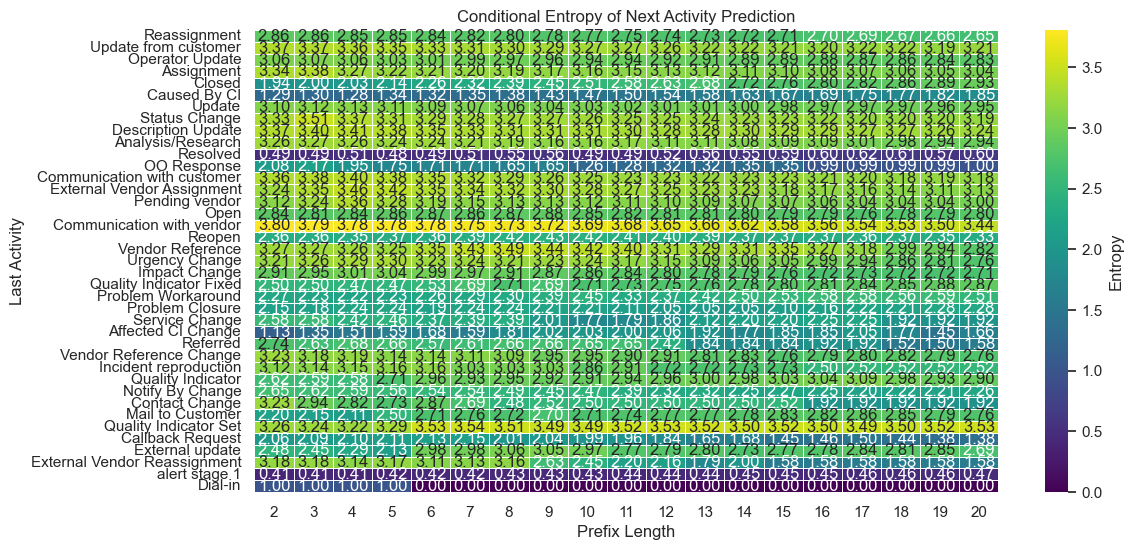

In [24]:
conditional_entropy = compute_conditional_entropy(conditional_dist)
plot_conditional_entropy_table(conditional_entropy, suffix_length_list=range(2, 21))

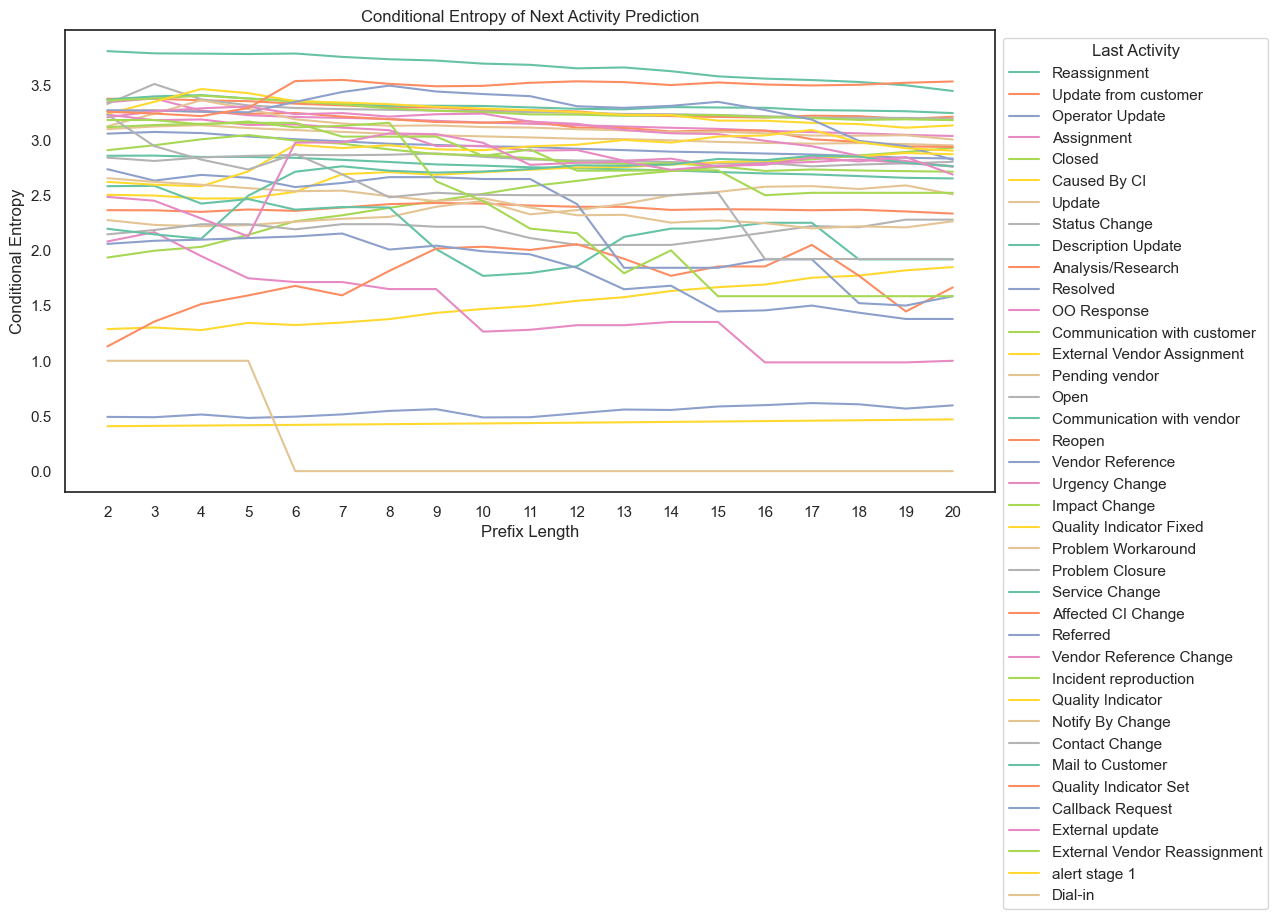

In [25]:
plot_conditional_entropy_curves(conditional_entropy, suffix_length_list=range(2, 21))

For a given activity $A$: when the entropy increases (respectively decreases heavily) between prefix lengths $\ell$ and $\ell+1$, it is due to a big population of **entropy-decreasing** (respectively **entropy-increasing**) occurencies of $A$ at position $\ell$, that is taken in account for prefixes of length $\le \ell$ but cannot be for length $\ell+1$. We can see this alteration of the distribution in the color shift of the distributions depending on prefix length.

This highlights the fact that the evolution of the entropy depends essentially on the positional distribution of the activities in the sequence.

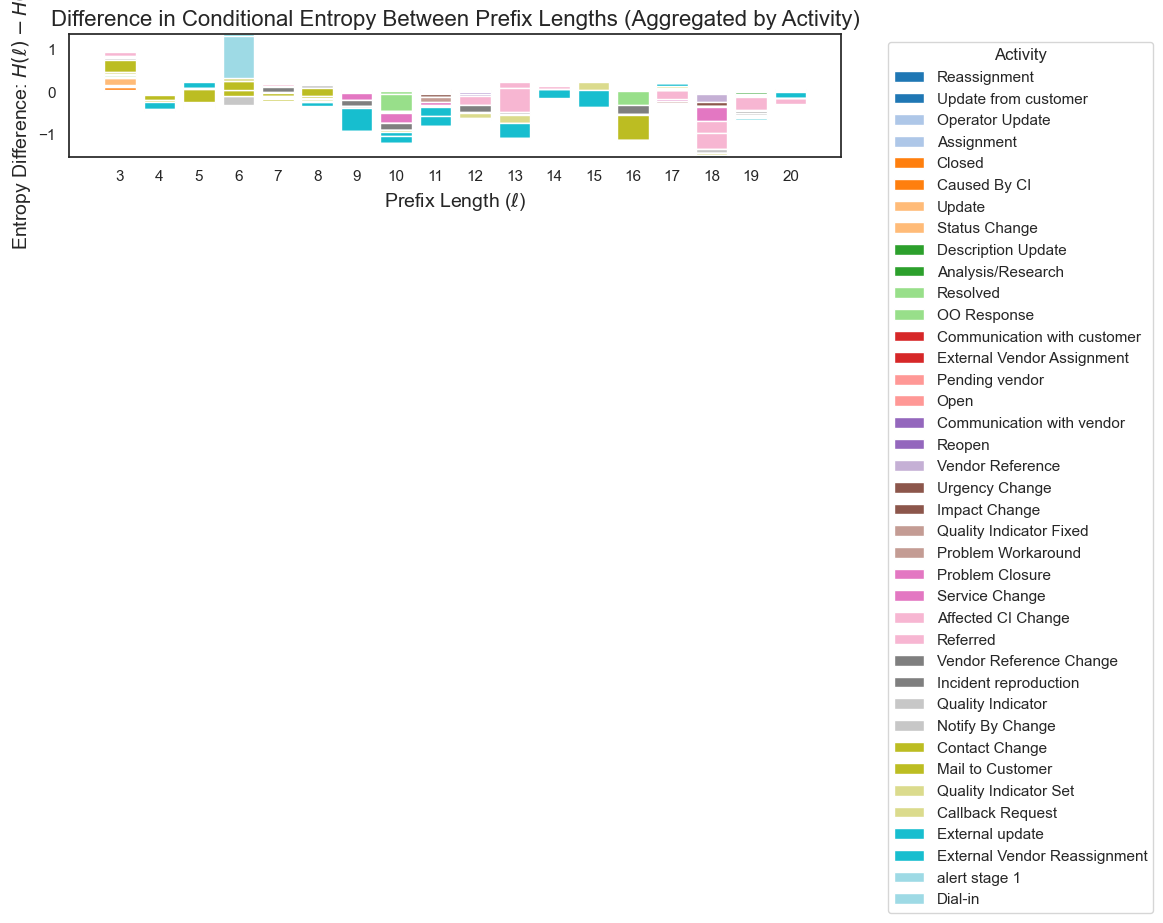

In [26]:
plot_entropy_difference_aggregated(conditional_entropy, range(2, 21))

In [36]:
def compute_weighted_entropy_diff(conditional_counts, conditional_dist, suffix_length_list, normalize="per_bin"):
    """Compute the weighted entropy using counts for each prefix length."""
    acceptable_normalizations = ["per_bin", "max_entropy"]
    if normalize not in acceptable_normalizations:
        raise ValueError(f"Normalization method must be one of: {acceptable_normalizations}")
    weighted_entropy_diff = {}
    for activity in ACTIVITY_LIST:
        for l in suffix_length_list[:-1]:
            # Get the counts for length l and l+1
            count_l = conditional_counts.get((activity, l), 0)
            count_l1 = conditional_counts.get((activity, l + 1), 0)

            # Calculate the total count for the prefix length l
            total_count_l = sum(count_l.values())
            total_count_l1 = sum(count_l1.values())
            total_l_l1 = total_count_l + total_count_l1

            # Get the probabilities
            probs_l = conditional_dist.get((activity, l), {})
            probs_l1 = conditional_dist.get((activity, l + 1), {})

            # Compute entropy for l and l+1
            entropy_l = -sum(p * np.log2(p) if p > 0 else 0 for p in probs_l.values())
            entropy_l1 = -sum(p * np.log2(p) if p > 0 else 0 for p in probs_l1.values())

            # Store the weighted entropy
            if normalize == "per_bin":
                ponderated_entropy_l = entropy_l * total_count_l / total_l_l1 if total_count_l > 0 else 0
                ponderated_entropy_l1 = entropy_l1 * total_count_l1 / total_l_l1 if total_count_l1 > 0 else 0

            elif normalize == "max_entropy":
                ponderated_entropy_l = entropy_l * np.log2(total_count_l) if total_count_l > 1 else 0
                ponderated_entropy_l1 = entropy_l1 * np.log2(total_count_l1) if total_count_l1 > 1 else 0

            else:
                return None

            weighted_entropy_diff[(activity, l)] = ponderated_entropy_l1 - ponderated_entropy_l

    return weighted_entropy_diff


def plot_entropy_difference_aggregated_with_counts(weighted_entropy_diff, suffix_length_list, with_labels=True):
    """Plot a bar per length l, split by activities showing the weighted difference in entropy between lengths l and l+1, with a trend line.
    When contributions are mixed (both positive & negative), positive bars are drawn slightly to the left, and negative bars slightly to the right.
    Additionally, an outline bar shows the total entropy difference per suffix length.
    """
    missing_suffix_lengths = [
        length
        for length in suffix_length_list
        if length > 2 and not any((activity, length - 1) in weighted_entropy_diff for activity in ACTIVITY_LIST)
    ]
    if missing_suffix_lengths:
        raise ValueError(f"The following suffix lengths are missing in the data: {missing_suffix_lengths}")

    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.4  # Half-width bars for clarity
    index = np.arange(len(suffix_length_list) - 1)

    activity_colors = plt.get_cmap("tab20", len(ACTIVITY_LIST)).colors
    all_differences = {activity: [] for activity in ACTIVITY_LIST}

    # Calculate differences for each activity and store total differences
    total_differences = np.zeros(len(index))

    for activity in ACTIVITY_LIST:
        differences = [weighted_entropy_diff.get((activity, l), 0) for l in suffix_length_list[:-1]]
        all_differences[activity] = differences
        total_differences += np.array(differences)

    # Initialize bottom stacks for positive and negative contributions
    bottom_positive = np.zeros(len(index))
    bottom_negative = np.zeros(len(index))

    for i, activity in enumerate(ACTIVITY_LIST):
        differences = np.array(all_differences[activity])

        # Separate positive and negative contributions
        positive_contributions = np.where(differences >= 0, differences, 0)
        negative_contributions = np.where(differences < 0, differences, 0)

        # Plot positive contributions slightly left
        ax.bar(
            index - bar_width / 2,
            positive_contributions,
            bar_width,
            bottom=bottom_positive,
            color=activity_colors[i],
            label=f"{activity}" if with_labels else None,
        )
        bottom_positive += positive_contributions  # Stack positives

        # Plot negative contributions slightly right
        ax.bar(
            index + bar_width / 2, negative_contributions, bar_width, bottom=bottom_negative, color=activity_colors[i]
        )
        bottom_negative += negative_contributions  # Stack negatives

    # Outline-only bar for total difference at each suffix length
    ax.bar(
        index,
        total_differences,
        bar_width * 2,
        fill=False,
        edgecolor="black",
        linewidth=1.5,
        label="Total (Outline)" if with_labels else None,
    )

    # Add trend line for total difference
    ax.plot(
        index,
        total_differences,
        marker="o",
        color="gray",
        linestyle="--",
        linewidth=1,
        markersize=6,
        label="Total Difference (Curve)" if with_labels else None,
    )

    # Customize the plot
    ax.set_xlabel(r"Prefix Length ($\ell$)", fontsize=14)
    ax.set_ylabel(r"Weighted Entropy Difference: $H(\ell) - H(\ell-1)$", fontsize=14)
    ax.set_title("Weighted Difference in Conditional Entropy Between Prefix Lengths", fontsize=16)

    ax.set_xticks(index)
    ax.set_xticklabels(suffix_length_list[1:])

    ax.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

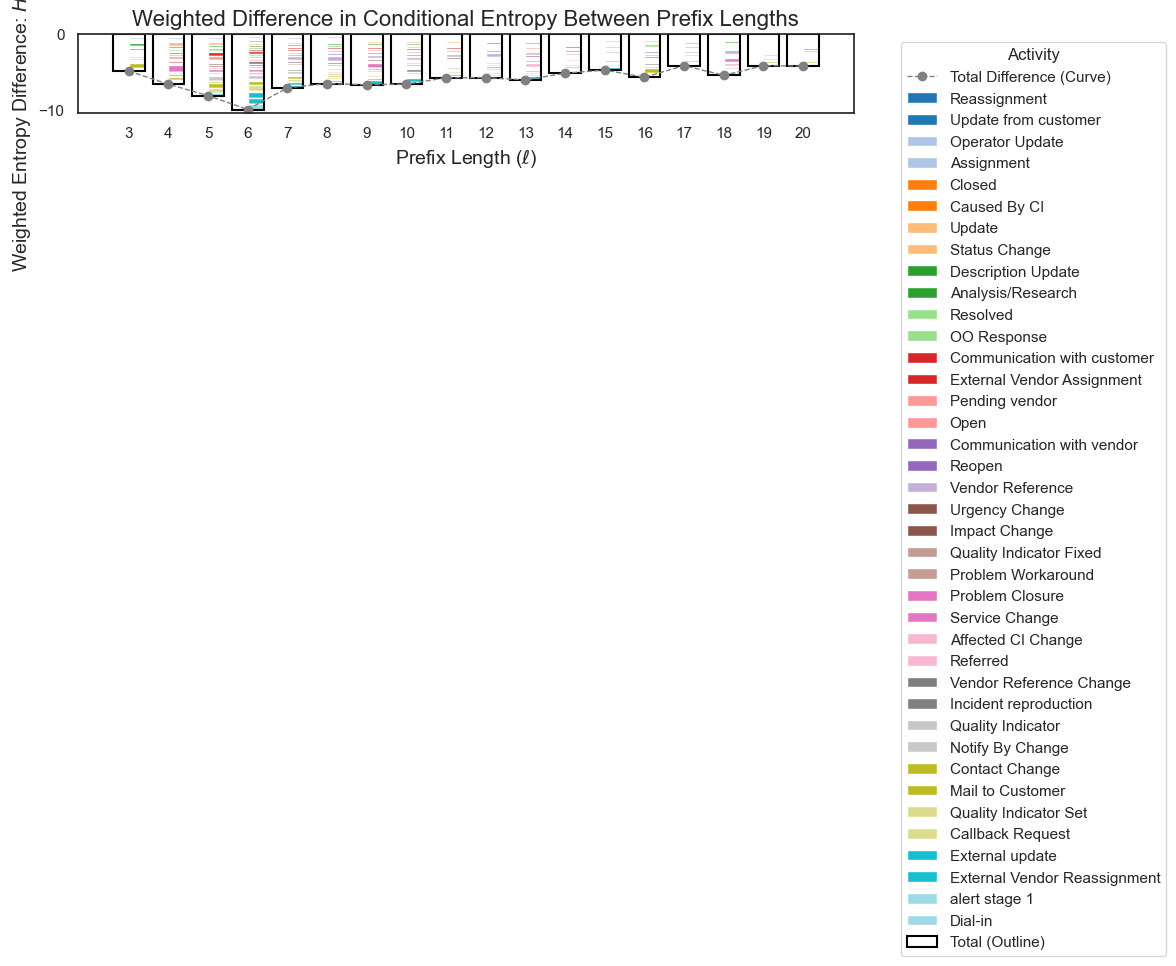

In [28]:
weighted_entropy = compute_weighted_entropy_diff(conditional_counts, conditional_dist, range(2, 21))
plot_entropy_difference_aggregated_with_counts(weighted_entropy, range(2, 21))

/var/folders/69/dpfqds0n6f9dds88rmx8pvp40000gp/T/ipykernel_2499/2568116725.py:106: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc='upper left')


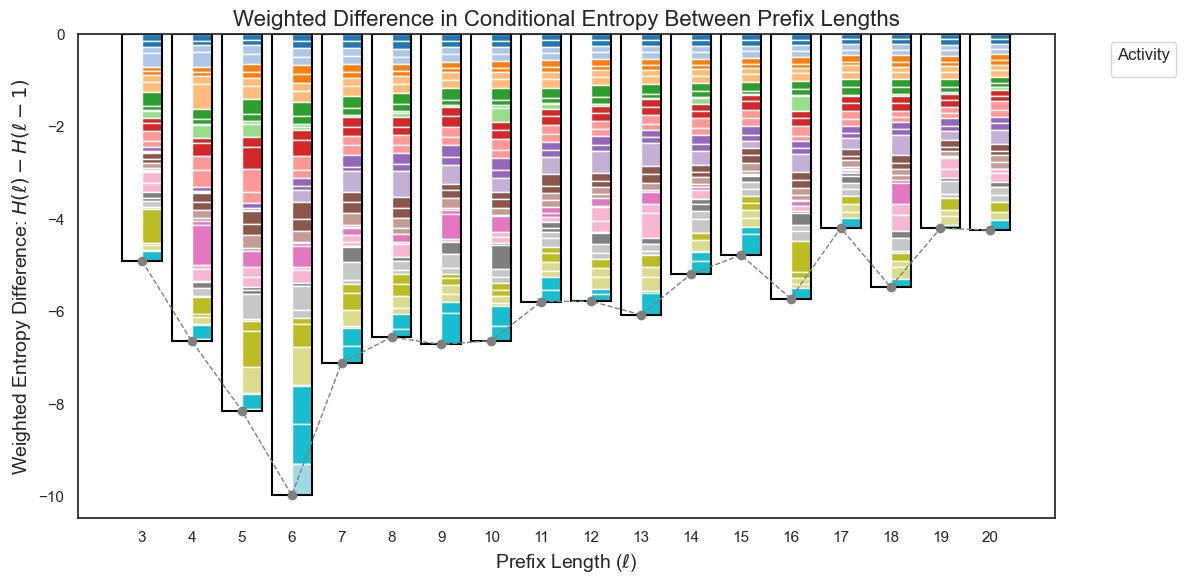

In [37]:
plot_entropy_difference_aggregated_with_counts(weighted_entropy, range(2, 21), with_labels=False)

In [29]:
def total_entropy_difference(weighted_entropy, suffix_length_list):
    """Compute the total difference in entropy between lengths l and l+1, for l in 'suffix_length_list'."""
    total_differences = {
        l + 1: sum(
            weighted_entropy.get((activity, l + 1), 0) - weighted_entropy.get((activity, l), 0)
            for activity in ACTIVITY_LIST
        )
        for l in suffix_length_list[:-1]
    }
    return total_differences


def select_best_ngrams(total_entropy_difference, ensemble_capacity):
    """Select the best n-grams based on the total entropy difference criteria."""
    selected_lengths = []

    # Iterate through suffix lengths in increasing order
    sorted_lengths = sorted(total_entropy_difference.keys())  # Ensure sorted order

    for l in sorted_lengths:
        if total_entropy_difference[l] < 0:  # Ensure negative difference
            if not selected_lengths or total_entropy_difference[l] < total_entropy_difference[selected_lengths[-1]]:
                selected_lengths.append(l)
            if len(selected_lengths) == ensemble_capacity:
                break  # Stop once we have enough lengths

    if len(selected_lengths) < ensemble_capacity:
        # Select the remaining lengths based on the highest decrease in the difference
        remaining_lengths = [l for l in sorted_lengths if l not in selected_lengths and l != sorted_lengths[0]]
        remaining_lengths.sort(key=lambda l: total_entropy_difference[l] - total_entropy_difference[l - 1])
        selected_lengths.extend(remaining_lengths[: ensemble_capacity - len(selected_lengths)])

    return selected_lengths

In [30]:
# Select the best n-gram lengths based on the total entropy difference
ensemble_capacity = 3
total_entropy_difference = total_entropy_difference(weighted_entropy, range(2, 21))
best_ngrams = select_best_ngrams(total_entropy_difference, ensemble_capacity)
print("Selected n-grams:", best_ngrams)

Selected n-grams: [3, 5, 17]


In [31]:
result_dict = {"sequence": [], "length": [], "frequency": []}

# Prepare column names dynamically
for i in range(2, max_seq_length + 1):
    result_dict[f"{i}-suffix"] = []

# Compute suffix frequencies
for sequence in unique_subsequences:
    if len(sequence) == 1:
        continue
    result_dict["sequence"].append(sequence)
    result_dict["length"].append(len(sequence))
    result_dict["frequency"].append(subsequence_counts[sequence])

    for length in range(2, len(sequence) + 1):
        suffix = tuple(sequence[-length:])  # Get suffix of desired length
        freq = subsequence_counts.get(suffix, 0)  # Get frequency from dataset
        result_dict[f"{length}-suffix"].append(freq)

    for length in range(len(sequence) + 1, max_seq_length + 1):
        result_dict[f"{length}-suffix"].append(0)


# Convert dictionary to DataFrame
df_suffix_frequencies = pd.DataFrame(result_dict)

# Display DataFrame
df_suffix_frequencies.head()

,sequence,length,frequency,2-suffix,3-suffix,4-suffix,5-suffix,6-suffix,7-suffix,8-suffix,...,169-suffix,170-suffix,171-suffix,172-suffix,173-suffix,174-suffix,175-suffix,176-suffix,177-suffix,178-suffix
0,"(Closed, Closed, Operator Update, Operator Upd...",28,1,4,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,"(Status Change, Operator Update, Communication...",22,1,8025,1856,411,145,14,1,1,...,0,0,0,0,0,0,0,0,0,0
2,"(Caused By CI, Quality Indicator Fixed, Operat...",7,1,10989,2078,99,9,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,"(Operator Update, Assignment, Status Change, A...",6,1,2642,572,59,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"(Quality Indicator Fixed, Closed, Closed, Assi...",5,1,10567,977,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Compute the number of unique subsequences for each length
unique_subseq_count_by_length = Counter(subsequence_lengths)

# Normalize suffix frequencies
for length in range(2, max_seq_length + 1):
    col_name = f"{length}-suffix"
    df_suffix_frequencies[col_name] = df_suffix_frequencies[col_name] / unique_subseq_count_by_length[length]

# Display DataFrame
df_suffix_frequencies.head()

,sequence,length,frequency,2-suffix,3-suffix,4-suffix,5-suffix,6-suffix,7-suffix,8-suffix,...,169-suffix,170-suffix,171-suffix,172-suffix,173-suffix,174-suffix,175-suffix,176-suffix,177-suffix,178-suffix
0,"(Closed, Closed, Operator Update, Operator Upd...",28,1,0.004391,0.000112,0.000024,0.000010,0.000006,0.000005,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"(Status Change, Operator Update, Communication...",22,1,8.809001,0.208469,0.009950,0.001415,0.000087,0.000005,0.000005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"(Caused By CI, Quality Indicator Fixed, Operat...",7,1,12.062569,0.233404,0.002397,0.000088,0.000006,0.000005,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"(Operator Update, Assignment, Status Change, A...",6,1,2.900110,0.064248,0.001428,0.000049,0.000006,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"(Quality Indicator Fixed, Closed, Closed, Assi...",5,1,11.599341,0.109738,0.000169,0.000010,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# Group sequences by length
length_groups = df_suffix_frequencies.groupby("length")

# Compute statistics for suffix distributions
suffix_distribution = {}

for length, group in length_groups:
    suffix_distribution[length] = {}

    for suffix_length in range(2, length + 1):
        col_name = f"{suffix_length}-suffix"
        suffix_freqs = group[col_name].values

        # Compute statistics
        suffix_distribution[length][col_name] = {
            "mean": np.mean(suffix_freqs),
            "std": np.std(suffix_freqs),
            "min": np.min(suffix_freqs),
            "max": np.max(suffix_freqs),
            "median": np.median(suffix_freqs),
            "percentile_25": np.percentile(suffix_freqs, 25),
            "percentile_75": np.percentile(suffix_freqs, 75),
        }

# Convert to DataFrame
df_suffix_distribution = pd.DataFrame.from_dict(suffix_distribution, orient="index")

# Display result
df_suffix_distribution.head()

,2-suffix,3-suffix,4-suffix,5-suffix,6-suffix,7-suffix,8-suffix,9-suffix,10-suffix,11-suffix,...,169-suffix,170-suffix,171-suffix,172-suffix,173-suffix,174-suffix,175-suffix,176-suffix,177-suffix,178-suffix
2,"{'mean': 0.5062180617191275, 'std': 1.74920149...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"{'mean': 1.4643418090795133, 'std': 2.94759125...","{'mean': 0.004712212163370364, 'std': 0.019917...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'mean': 2.91402142459462, 'std': 3.9549545775...","{'mean': 0.018984668650921337, 'std': 0.043057...","{'mean': 0.00019160293241792605, 'std': 0.0007...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"{'mean': 4.3994600396603385, 'std': 4.48555928...","{'mean': 0.04102745851953346, 'std': 0.0634791...","{'mean': 0.0007630401174064902, 'std': 0.00172...","{'mean': 2.708062349867265e-05, 'std': 6.73153...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"{'mean': 5.656774888143042, 'std': 4.684787340...","{'mean': 0.06440103689680429, 'std': 0.0777656...","{'mean': 0.0015858479340984514, 'std': 0.00267...","{'mean': 7.79890315751585e-05, 'std': 0.000170...","{'mean': 9.377029400898e-06, 'std': 1.32448690...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


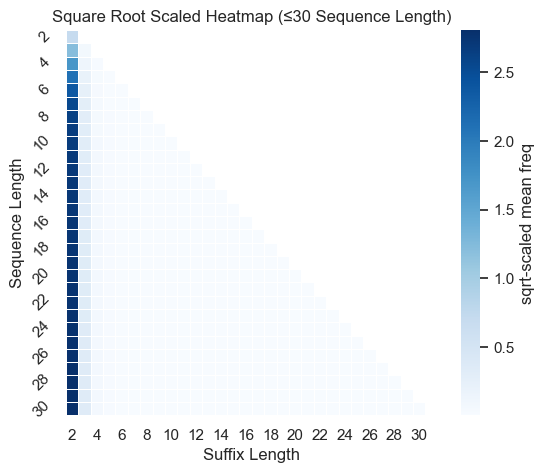

In [34]:
# Convert dictionary to DataFrame
df_suffix_distribution = pd.DataFrame.from_dict(suffix_distribution, orient="index")

# Extract mean values for heatmap
heatmap_data = df_suffix_distribution.map(lambda x: x["mean"] if isinstance(x, dict) else np.nan)

# Rename columns for better visualization
heatmap_data.columns = [col.replace("-suffix", "") for col in heatmap_data.columns]

# Extract only rows where sequence length ≤ 30
heatmap_small = heatmap_data.loc[heatmap_data.index <= 30, heatmap_data.columns[:30]]

# Apply square root transformation to enhance small differences
heatmap_small = np.sqrt(heatmap_small)

# Plot smaller heatmap
plt.figure(figsize=(6, 5))
ax = sns.heatmap(heatmap_small, cmap="Blues", linewidths=0.5, cbar_kws={"label": "sqrt-scaled mean freq"})

# Rotate Y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=45)

# Labels and title
plt.xlabel("Suffix Length")
plt.ylabel("Sequence Length")
plt.title("Square Root Scaled Heatmap (≤30 Sequence Length)")

plt.show()

In [35]:
# # Count the frequency of each subsequence
# counter = Counter(unique_subsequences)
# print(f"Total number of unique subsequences: {len(counter)}")

# # Now let's filter subsequences by length > 1, > 2, > 3
# subsequences_by_length = {i: [] for i in range(1, 6)}  # For lengths 1, 2, 3, 4, 5

# # Populate the subsequences_by_length dictionary
# for subseq, freq in counter.items():
#     if len(subseq) <= 5:  # We are interested in subsequences up to length 5
#         subsequences_by_length[len(subseq)].append((subseq, freq))

# # Function to plot the frequency distribution of the top N subsequences
# def plot_subsequence_distribution(length, subsequences_by_length):
#     subsequences_by_length_sorted = sorted(subsequences_by_length[length], key=lambda x: x[1], reverse=True)
#     top_subsequences = subsequences_by_length_sorted[:50]

#     subsequences, frequencies = zip(*top_subsequences)
#     subsequences = ['-'.join(seq) for seq in subsequences]  # Convert subsequences to string for plotting

#     plt.figure(figsize=(12, 6))
#     plt.barh(subsequences, frequencies, color='skyblue')
#     plt.xlabel('Frequency')
#     plt.ylabel('Subsequences')
#     plt.title(f"Top 50 Most Frequent Subsequences of Length {length}")
#     plt.gca().invert_yaxis()  # To display the top subsequences at the top
#     plt.tight_layout()  # Adjust layout for better spacing
#     plt.show()

# # Plot subsequence distributions for length 1, >1, >2, >3
# for length in range(1, 6):
#     plot_subsequence_distribution(length, subsequences_by_length)

# # Box and whisker plot of sequence lengths > 1, > 2, > 3 with log scale on Y-axis
# sequence_lengths_by_filter = {i: [] for i in range(1, 6)}

# # Collect sequence lengths greater than 1, 2, 3
# for seq in grouped:
#     for length in range(1, 6):
#         if len(seq) >= length:
#             sequence_lengths_by_filter[length].append(len(seq))

# plt.figure(figsize=(12, 6))
# plt.boxplot([sequence_lengths_by_filter[length] for length in range(1, 6)],
#             labels=[f'Length $\geq$ {length}' for length in range(1, 6)])
# plt.yscale('log')  # Set the Y-axis to log scale
# plt.title("Box and Whisker Plot of Sequence Lengths (Log Scale)")
# plt.ylabel('Sequence Length (Log Scale)')
# plt.show()

# # Plotting activity frequency distribution by subsequence length (1, 2, 3, 4, 5)
# activity_frequencies_by_length = {i: Counter() for i in range(1, 6)}

# # Count activities in subsequences of length 1, 2, 3, 4, 5
# for subseq, freq in counter.items():
#     for length in range(1, 6):
#         if len(subseq) == length:
#             for activity in subseq:
#                 activity_frequencies_by_length[length][activity] += freq

# # Plotting the activity distributions
# plt.figure(figsize=(12, 6))
# for length in range(1, 6):
#     activities, activity_frequencies = zip(*activity_frequencies_by_length[length].items())
#     plt.plot(activities, activity_frequencies, label=f"Length {length}", marker='o')

# plt.title("Activity Frequency Distribution by Subsequence Length (1 to 5)")
# plt.xlabel('Activity')
# plt.ylabel('Frequency')
# plt.legend(title='Subsequence Length')
# plt.xticks(rotation=45)
# plt.show()
